In [1]:
import MeCab

In [2]:
me = MeCab.Tagger("-Ochasen")
print(me.parse("あの花は美しい"))

あの	アノ	あの	連体詞		
花	ハナ	花	名詞-一般		
は	ハ	は	助詞-係助詞		
美しい	ウツクシイ	美しい	形容詞-自立	形容詞・イ段	基本形
EOS



### 30

In [3]:
with open('neko1.txt.mecab', 'r',encoding='utf-8') as f:
    lines = f.readlines()

In [4]:
_kts_list=[line.replace("\t",",") for line in lines]
_kts_list=[line for line in _kts_list if line!='EOS\n']
_kts_list=[line for line in _kts_list if "\u3000" not in line]
_kts_list=_kts_list[1:]
kts_list=[_line.split(",") for _line in _kts_list]

In [5]:
maru_posi=[line+1 for line in range(len(kts_list)) if kts_list[line][0]=="。"]
kts_lists=[kts_list[0:maru_posi[0]]]
for _list in range(0,len(maru_posi)-1):
    kts_lists.append(kts_list[maru_posi[_list]:maru_posi[_list+1]]) 

### 31

In [6]:
sur_verb=[_line[0] for _line in kts_list if _line[1]=='動詞']

### 32

In [29]:
base_verb=[_line[7] for _line in kts_list if _line[1]=='動詞']

### 33

In [30]:
meisiku=[]
for _line in range(len(kts_list)):
    if kts_list[_line][0]=='の':
         if (kts_list[_line-1][1]=='名詞')&(kts_list[_line+1][1]=='名詞'):
                meisiku.append(kts_list[_line-1][0]+kts_list[_line][0]+kts_list[_line+1][0])

### 34

In [31]:
clist=[]
c=0
for _line in range(len(kts_list)):
    if kts_list[_line][1]=='名詞':
        c+=1
    else:
        c=0
    clist.append(c)

In [32]:
sur_all=[_line[0] for _line in kts_list]

In [33]:
meisiku=[]
for _line in range(len(clist)):
    if clist[_line]>=2:
        if clist[_line+1]<clist[_line]:
            meisiku.append("".join(sur_all[_line-clist[_line]+1:_line+1]))

### 35

In [34]:
sur_voc=[i[0] for i in kts_list if i[1]!='記号']

In [35]:
import collections
count = collections.Counter(sur_voc)

In [36]:
count_sort=count.most_common()

### 36

Text(0, 0.5, '出現回数')

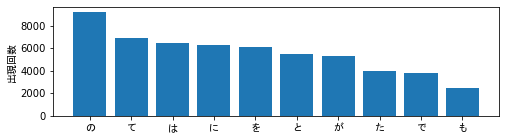

In [15]:
count_name=[]
count_value=[]
for i in count_sort[:10]:
    count_name.append(i[0])
    count_value.append(i[1])
import matplotlib.pyplot as plt
plt.figure(figsize=(8,2))
plt.bar(count_name,count_value)
plt.xticks(fontname="MS Gothic")
plt.ylabel('出現回数',fontname="MS Gothic")

### 37

In [16]:
maru_posi=[line+1 for line in range(len(kts_list)) if kts_list[line][0]=="。"]
kts_lists_stc=[[kts_list[maru][0] for maru in range(0,maru_posi[0]) if kts_list[maru][1]!="記号"]]
for _list in range(0,len(maru_posi)-1):
    l=[]
    for maru in range(maru_posi[_list],maru_posi[_list+1]):
        if kts_list[maru][1]!="記号":
            l.append(kts_list[maru][0])
    kts_lists_stc.append(l)

In [17]:
kyo_neko=[]
for i in kts_lists_stc:
    if "猫" in i:
        for j in i:
            if j!="猫":
                kyo_neko.append(j)

In [18]:
import collections
count = collections.Counter(kyo_neko)

In [19]:
count_sort=count.most_common()

Text(0, 0.5, '出現回数')

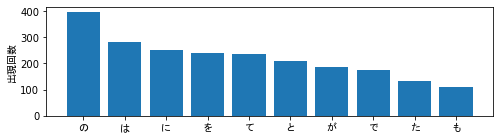

In [20]:
count_name=[]
count_value=[]
for i in count_sort[:10]:
    count_name.append(i[0])
    count_value.append(i[1])
import matplotlib.pyplot as plt
plt.figure(figsize=(8,2))
plt.bar(count_name,count_value)
plt.xticks(fontname="MS Gothic")
plt.ylabel('出現回数',fontname="MS Gothic")

### 38

In [37]:
count_name=[]
count_value=[]
for i in count_sort:
    count_name.append(i[0])
    count_value.append(i[1])
import matplotlib.pyplot as plt
plt.figure(figsize=(8,2))
a=plt.hist(count_value,bins=100)
plt.xticks(fontname="MS Gothic")
plt.xlabel('出現回数',fontname="MS Gothic")
plt.ylabel('種類数',fontname="MS Gothic")

### 39

In [42]:
count_rank=[i+1 for i in range(len(count_sort))]

Text(0, 0.5, '種類数')

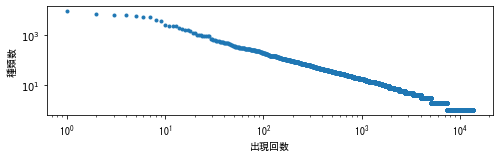

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,2))
plt.plot(count_rank,count_value,marker="o",linewidth=0,markersize=3)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontname="MS Gothic")
plt.xlabel('出現回数(log)',fontname="MS Gothic")
plt.ylabel('種類数(log)',fontname="MS Gothic")